In [19]:
import matplotlib.pyplot as plt
from random import SystemRandom, randint
from miller_rabin import is_prime
from time import process_time   
import math
import pandas as pd
import numpy as np
import random as ran
import os

## Core 4: Decompose Function

### How Does the Decompose Function Work?

The decompose function is using trial division in order to find the factors of a composite integer $N$. We find the smallest factor $p$ of our input $N$ and then divide our $N$ by $p$ to find the next factors of this new number. We iterate this until the number we get to through divisions is equal to $1$.

### Let's Try an Example with $N = 899$

Firstly, we find the smallest factor of $899$ and we do this with our smallest_factor function. This finds the smallest factor of $899$ by finding the remainder when dividing $899$ with each increasing integer starting from $2$. Once the remainder of this division is equal to $0$, we return the value which we divided $899$ by and in this case, it would be $29$.

We create a new entry in our dictionary and store this factor here.

Next we compute $899$ divided by its smallest factor. This is equivalent to $\frac{899}{29} = 31$.

We again find the smallest factor of $31$ and since this is prime, it returns $31$ and we again create a new entry and add it into our dictionary to store with $29$. Now, we divide the smallest factor of $31$ with $31$ and we clearly get $1$ and this is where we return the dictionary of factors for $899$.

In [3]:
def decompose(n):
    """
    Generates a dictionary representing the prime decomposition.
    I have slightly modified this function just to include a counter for how many operations the function carries out 
    for each n. This is to analyse the time complexity of the function.
    """
    factors={}
    current_number=n
    count1 = 0                                #introducing a counter
    while current_number > 1:
        p=smallest_factor(current_number)[0]
        count1 += smallest_factor(current_number)[1]    #increment the count by the number of operations the smallest_factor function has to carry out for the current number.
        if p in factors.keys():                 #if p is not a new factor, increase the power
            factors[p]+=1             
        else:
            factors[p]=1                           #if p is a new factor, create a new entry
        current_number = current_number//p
        count1 += 1                              #increment the count by 1 for each time we are in the while loop
    return factors,count1

def smallest_factor(n):
    """
    Returns the smallest factor of a positive integer n, which isn't 1.
    This function has been modified to introduce a counter to better analyse the time complexity of the decompose 
    function; we use this function in the decompose function.
    """
    sqrt=n**0.5
    i=2
    count = 0
    while i<=sqrt:
        if n%i==0:
            count += 1                         #increment the count by 1 for each time we are in the while loop
            return i, count
        i+=1
        count += 1
    return n,count  



def random_prime(n_bit, t, trails = 500):
    '''Returns a uniform n-bit prime, with probability at most 2^(-t) getting a composite,
    the higher the trails the less chance of failing to generate a prime but takes longer'''
    for i in range(0, trails):
        p = np.random.randint(0,2,n_bit-2)
        b = "".join(str(i) for i in p)
        my_int = int("1" + b + "1", 2) #Want at least n bit and gives odd        
        if is_prime_miller_rabin(my_int, t):
            return my_int
    return "Fail"

def is_prime_miller_rabin(N,t = 40):
    '''If N is prime, test always outputs True(prime)
    If N is composite outputs False(not prime) except with probability at most 2^(-t)'''
    
    if N == 2:
        return True # Prime
    
    if N == 3:
        return True # Prime
    
    if N % 2 == 0:
        return False # Comp
    
    if N < 2:
        return False # Comp
    
    d, s = calc_d_s(N)
    for j in range(0,t):
        a = ran.randrange(2,N-1)
        if is_composite(N, d, s, a):
            return False #Comp
    return True #Prime

def calc_d_s(N):
    s = 0
    Num = N - 1
    while Num%2 == 0:
        Num //= 2
        s += 1
    d = Num
    return int(d), int(s)

def is_composite(N, d, s, a):
    '''Evaulate a^d != +-1 mod(N), and, a^(d*2^r) != -1 mod(N) for r in {1,2,...,s-1},
    However, if output False does not mean prime, it could be a strong liar'''
    remain = pow(a, d, N)
    if (remain != 1) and (remain != N - 1):
        for r in range(1,s):
            remain = pow(remain, 2, N)
            if remain != N-1:
                pass
            else:
                return False    
    else:
        return False
    
    return True

In [4]:
#Tests

assert smallest_factor(10)[1] == 1           #checking the count is 1, it should be since 10 is an even number
assert smallest_factor(5)[1] == 1            #checking the count is 1, should be since sqrt(5) < 3 so cycles once
assert smallest_factor(15)[1] == 2           #the count should be 2 since it cycles through the loop twice

assert decompose(10)[1] == 4.   #this holds because we go through the while loop twice since 10 has 2 factors and each factor has to only go through loop in smallest_factor function once.

### Code for Generating $N = pq$ where $p,q$ are $k$ bit Primes 

In [5]:
def generate_N(k_bit,n,verbose = False):
    '''
    Takes k and n as inputs where k is how many bits the random primes, p and q are. The input n is how many N = p*q 
    we generate. This function returns an n-sized list of N's (p*q's).
    We have verbose as an input for our tests below to check that indeed N = p*q.
    This function will only generate N's where k is less than 32 bits because otherwise, we would experience an
    integer overflow error. However, since we are only using this function for k up to 27, this is not an issue in our
    case.
    '''
    
    alist = ([])
    for i in range(2*n):
        alist.append(random_prime(k_bit, 40))      #we append 2n random k_bit primes to our empty list
    x = np.array_split(alist,n)                 #we split this list into pairs of k_bit primes
    blist = ([])
    for j in range(0,n):
        blist.append(np.prod(x[j]))             #we compute the product of each pair of k_bit primes and append them to another empty list
    if verbose == True:                         #if we want to, we have the option of returning the pair of primes as well as the product of them
        return np.array(blist),x                        #this is for our checks below
    else:
        return np.array(blist).astype(np.int64)
      

def generate_sampleN(a,b,c):
    '''
    Takes a,b,c as inputs where a is the smallest a bit p and q random primes we generate to produce N=p*q and b is 
    the largest b bit p and q random primes we generate to produce N=p*q. The input c tells the function how many N's
    to produce for each bit size. 
    This function returns a b - a + 1 dimensional array of N's for each bit size between a and b.
    '''
    if b >= a:                   #this must hold for the function to run 
        bignumbers = ([])
        for p in range(a,b+1):
            bignumbers.append(generate_N(p,c))   #append c number of N=pq where p and q are primes of bit size between a and b for each bit size
        return np.array(bignumbers)         #returns an b-a+1 dimensional array of N's for each p,q of bit size between a and b
    else:
        return 'Error: Second input must be greater than the first input.'   #error message if b<a
    


In [22]:
#Tests
assert len(generate_N(5,1)) == 1             #Checking the final input gives the number of N's generated
assert len(generate_N(31,5)) == 5

a = (generate_N(5,1,True))                   #Checking N = p*q
assert np.product(a[1]) == a[0]
b = (generate_N(7,5,True))
for i in range(5):
    assert np.product(b[1][i]) == b[0][i]
    
assert len(generate_sampleN(2,5,6)) == 5-2+1     #Checking this function generates a b-a+1 dimensional array of N's for each bit size between a and b
assert len(generate_sampleN(3,9,11)[5]) == 11    #Checking each sample of N's generated for each bit size betwen a and b has length c
for j in range(8-4+1):
    assert len(generate_sampleN(4,8,13)[j]) == 13  
    
assert generate_sampleN(3,2,5) == 'Error: Second input must be greater than the first input.' #Checking error message



### Finding the Time Complexity

To find the time complexity of the decompose function, I will plot a graph and table of the average decompose run time for increasing bit sizes, as well as a graph and table of the number of operations (count) executed by the decompose function for increasing bit sizes and see what the relationship is.


### Justification of Sample Size

I have chosen to generate a sample of $N's$ where $p$ and $q$ are between $10$ and $27$ bit random primes because otherwise if they were longer, it would take a very long time for the average decompose time to run. I have also chosen a sample size of $4$ for each $N$ so I am able to find an average from a decently sized sample as well as so the average decompose time doesn't take too long to run.

### Average Decompose Run Times

Below is a table and a graph displaying the average decompose times for these $N's$.

In [52]:
def avg_times(a,b,c,func):
    '''
    Takes a,b,c and func as inputs where a is the smallest a bit p and q random primes we generate to produce N=p*q and b is 
    the largest b bit p and q random primes we generate to produce N=p*q. The input c tells the function how many N's
    to produce for each bit size. The func input is which function we are choosing to find the average running time 
    for these varying N.
    This function returns the average running times as a list.
    '''
    samples = generate_sampleN(a,b,c)                   #generating our N's to test on
    sample_size = c

    start = []
    end = []
    total_time = []
    average_time = []
    for i in range(b-a+1):                              #finding the time taken for each N in our sample
        start.append(process_time())           
        for n in samples[i]:
            func(n)
        end.append(process_time())   

    for j in range(b-a+1):                              #calculating the average time for each bit size between a and b
        total_time.append(end[j] - start[j])
    for k in range(b-a+1):
        average_time.append(total_time[k] / sample_size)
        
    my_time_data = {"Average Time": average_time}
    time_data_frame = pd.DataFrame(data=my_time_data)
    time_data_frame.index = range(a, b+1)
    time_data_frame.index.name = "bit size of p and q"

    return time_data_frame

In [53]:
read_times = False
dl_decompose_time_file_name = 'Decompose Times.csv'

In [30]:
# Decompose Times
if os.path.exists('data/' + dl_decompose_time_file_name) and read_times:
    # read
    dl_decompose_times = pd.read_csv(
        'data/' + dl_decompose_time_file_name, index_col=0)
else:
    # Create times
    dl_decompose_times = avg_times(10, 20, 4, decompose)  # 21
    # Save times
    dl_decompose_times.to_csv('data/' + dl_decompose_time_file_name)

In [36]:
dl_decompose_times

,Mean time
bit size of p and q,
10,0.002987
11,0.008647
12,0.013205
13,0.018752
14,0.044644
15,0.092243
16,0.147596
17,0.313842
18,0.581343


### Average Number of Operations in Decompose Function

Below is a table of the average number of operations which the decompose runs for increasing bit sizes.

In [42]:
def avg_operations(a,b,c,func):
    '''
    Takes a,b,c and func as inputs where a is the smallest a bit p and q random primes we generate to produce N=p*q and b is 
    the largest b bit p and q random primes we generate to produce N=p*q. The input c tells the function how many N's
    to produce for each bit size. The func input is which function we are choosing to find the average number of 
    operations for these varying N.
    This function returns the average number of operations as a list.
    '''
    samples = generate_sampleN(a,b,c)                            #generating our N's to test on
    sample_size = c

    operations = []
    total_operations = []
    average_operations = []
    for i in range(b-a+1):                                       #finding the number of operations for each N in our sample
        for n in samples[i]:
            operations.append(func(n)[1])
        
    split_operations = np.array_split(operations,b-a+1)       
    for j in range(b-a+1):                                        #calculating the average number of operations for each bit size between a and b
        total_operations.append(np.sum(split_operations[j]))
    for k in range(b-a+1):
        average_operations.append(total_operations[k]/c)
        
    my_ops_data = {"Average Operations": average_operations}
    ops_data_frame = pd.DataFrame(data=my_ops_data)
    ops_data_frame.index = range(a, b+1)
    ops_data_frame.index.name = "bit size of p and q"

    return ops_data_frame

In [74]:
avg_operations(10, 20, 4, decompose)

,Average Operations
bit size of p and q,
10,800.00
11,1349.25
12,2923.50
13,6293.50
14,10455.00
15,21483.00
16,41390.75
17,90761.50
18,178671.75


In [38]:
dl_decompose_ops_file_name = 'Decompose Operations.csv'

In [43]:
# Decompose Times
if os.path.exists('data/' + dl_decompose_ops_file_name) and read_times:
    # read
    dl_decompose_ops = pd.read_csv(
        'data/' + dl_decompose_ops_file_name, index_col=0)
else:
    # Create times
    dl_decompose_ops = avg_operations(10, 20, 4, decompose)  # 21
    # Save times
    dl_decompose_ops.to_csv('data/' + dl_decompose_ops_file_name)

In [44]:
dl_decompose_ops

,Average Operations
bit size of p and q,
10,595.75
11,1375.75
12,2896.25
13,6239.00
14,10581.75
15,23505.75
16,40879.75
17,77064.75
18,192245.75


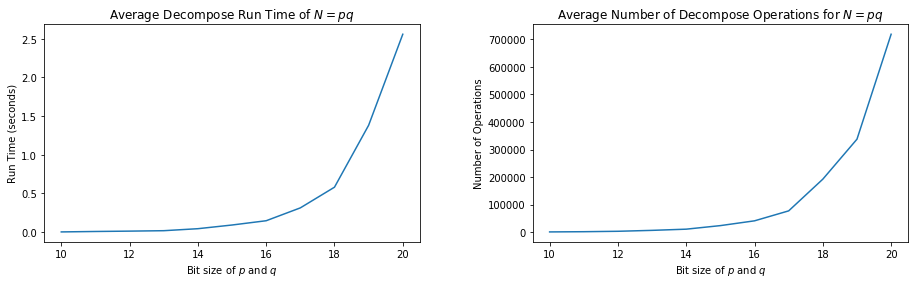

In [45]:
x = range(10,21)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(x,dl_decompose_times)
ax2.plot(x,dl_decompose_ops)
ax1.set_title('Average Decompose Run Time of $N = pq$')
ax1.set_xlabel('Bit size of $p$ and $q$')
ax1.set_ylabel('Run Time (seconds)')
ax2.set_title('Average Number of Decompose Operations for $N = pq$')
ax2.set_xlabel('Bit size of $p$ and $q$')
ax2.set_ylabel('Number of Operations')
plt.subplots_adjust(left = 0, right = 2, wspace = 0.3)
plt.show()

In [60]:
def find_ratio(df):
    '''
    Given a dataramef input, this function finds the ratio between each consecutive term in the list and finds the
    mean and standard deviation of this ratio.
    '''
    dlist = []
    df1 = np.array(df)
    for i in range(len(df1)-2):                 #finding the ratio between consecutive terms in the list
        ratio = df1[i+1]/df1[i]
        dlist.append(ratio)
    ratio_mean = np.mean(dlist)                   #finding mean of ratio
    ratio_std = np.std(dlist)                     #finding standard deviation of ratio
    return ratio_mean,ratio_std

### Ratio of Average Run Time of Decompose Function for Increasing Bit Sizes

In [61]:
decompose_time_ratios = find_ratio(dl_decompose_times)

print('Mean Ratio of Decompose Times = {}'.format(decompose_time_ratios[0]))
print('Standard Deviation of Ratio of Decompose Times = {}'.format(decompose_time_ratios[1]))

Mean Ratio of Decompose Times = 2.0271723816686227
Standard Deviation of Ratio of Decompose Times = 0.4525245815263393


### Ratio of Average Number of Operations of Decompose Function for Increasing Bit Sizes

In [63]:
decompose_ops_ratios = find_ratio(dl_decompose_ops)

print('Mean Ratio of Decompose Operations = {}'.format(decompose_ops_ratios[0]))
print('Standard Deviation of Ratio of Decompose Operations = {}'.format(decompose_ops_ratios[1]))

Mean Ratio of Decompose Operations = 2.0400450000246813
Standard Deviation of Ratio of Decompose Operations = 0.26731220614543144


### Decompose Time Complexity

A good guess for the time complexity of the decompose function we are using is $O(2^p)$, where $p$ is the bit size of one of our non-trivial prime factors of $N = pq$ where $p$ and $q$ are of the same bit size. We are able to estimate the time complexity because we have found the average runtime and average number of operations the decompose function performs and they increase by the same rate as we will explain later on.

Regarding the average runtime, from earlier, the mean ratio (from a sample size of 4 for each bit size) of the average run time for the decompose function performs for consecutive $N's$ is the roughly the same at $2$. Furthermore, the standard deviation for the ratio is small implying that the ratio roughly stays constant. In addition, the graphs for the average decompose run time is in the shape of $y = 2^x$.

Furthermore, for consecutive $N's$, the average number of operations for the decompose function roughly doubles too and the ratio has a low standard deviation too, as seen above, meaning this ratio stays constant. Since, the average number of operations also increases at the same rate as the average run time of the decompose function, we have a good amount of evidence to be confident that this function does have an $O(2^p)$ time complexity.

However, this may not necessarily be the case because our graph for the average runtimes may change drastically for larger $p$ and $q$ but it is a reasonable guess because the data points we have fit this model well. From this time complexity, we are able to extrapolate the graph and make estimates for the average decompose times for larger $N$.

### Estimating the Average Decompose Time for Larger $N$

It is of our best interest to be able to estimate the average decompose time because as the bit size increases for $N$, it takes longer to find the average time taken, and to find when it become infeasible, we want to find how long it takes for larger $N$.

In order to estimate the average decompose time for larger values of $N$, we will plot a graph of shape $y = c \cdot 2^x$, where $c$ is our average decompose runtime for our smallest value of $N$, this would be when $p$ and $q$ are of $10$ bit sizes. We will compute a better average time for this value of $N$ using a larger sample size of $20$, because this value is our scale factor for the graph so will affect all values in our graph a lot so it must be as accurate as possible. 

In [31]:
c = avg_times(10,10,20,decompose)

Below is a table and graph of of our estimated average decompose time.

In [32]:
p = np.arange(10,50,0.01)
flist = []
for n in np.arange(0,40,0.01):
    flist.append(c[0]*(2**n))
    

print("bit_size of p and q   Estimated Average decompose(N) time")
print("===================   ===================================")
for n in range(40):
    average_time3 = str(flist[100*n])
    y = n+10
    print("{:7s}               {:20s}".format(str(y),average_time3))


bit_size of p and q   Estimated Average decompose(N) time
===================   ===================================
10                    0.0033184999999775755
11                    0.006636999999955151
12                    0.013273999999910302
13                    0.026547999999820604
14                    0.05309599999964121 
15                    0.10619199999928242 
16                    0.21238399999856483 
17                    0.42476799999712966 
18                    0.8495359999942593  
19                    1.6990719999885187  
20                    3.3981439999770373  
21                    6.796287999954075   
22                    13.59257599990815   
23                    27.1851519998163    
24                    54.3703039996326    
25                    108.7406079992652   
26                    217.4812159985304   
27                    434.9624319970608   
28                    869.9248639941216   
29                    1739.849727988243   
30                    3

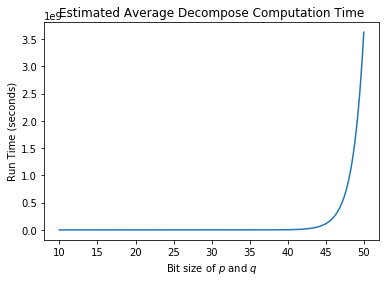

In [33]:
plt.plot(p,flist)
plt.xlabel('Bit size of $p$ and $q$')
plt.ylabel('Run Time (seconds)')
plt.title('Estimated Average Decompose Computation Time')
plt.show()

## At What Bit Length does the Decompose Function Become Infeasible?

### The Purpose of the Decompose Function (Security)
The purpose of the decompose function is to find the prime decomposition of a number. In terms of an RSA setting, we would be using this function to attempt to crack the private key, which are, say, primes $p$ and $q$ given the public key $N = pq$. From the public key, we are also given $e$, an auxiliary number called the exponent but the decompose function does not use this information. Therefore, it is clear to see that the decompose function, which does not use the exponent will not be as efficient at finding the prime decomposition as a function which does use this extra information, like the RSA decryption method mentioned in the previous question.
Furthermore, since the private key in an RSA setting is usually 2048 bits long, the decompose function is not effective at all at cracking this. This is because, as we discussed earlier in the time complexity section, due to the decompose function being $O(2^p)$, it is effective at cracking short private keys but becomes ineffective very quickly as the bit length of the private key increases.

### Maximum Bit Length Feasibility
The NIST (National Institute of Standards and Technology) recommends that you should update private and public keys at least once every $2$ years, and since the decompose function's purpose is to crack the private key, I can conjecture that it becomes infeasible if it takes longer than $2$ years to crack it. 
https://www.keylength.com/en/4/

On my laptop, the average decompose time for $N = pq$ where $p$ and $q$ are:
+ $30$-bit random primes is approximately $26$ minutes
+ $40$-bit random primes is approximately $19$ days 
+ $45$-bit random primes is approximately $1.64$ years
+ $46$-bit random primes is approximately $3.3$ years

Therefore, we can conjecture that the decompose function for $N=pq$ becomes infeasible when $p$ and $q$ are greater than $45$-bit random primes.

### How Long is the Bit Length in Practice?

In practise, the bit length of $N$ is usually $2048$ bits because this is deemed secure enough to have a very low probability of being hacked. Indeed, the factoring record is the factorisation of the $829$-bit RSA-$250$, set in February 2020. However, with quantum computers currently being developed which are a lot faster than traditional computers, RSA and many other traditional encryption methods used today may become obsolete; a huge security issue. Luckily, there are already a few quantum-resistant security protocols which are being developed to work around this encryption problem so hopefully these encryption methods will be developed before quantum computers because otherwise it would result in a security disaster.

https://phys.org/news/2020-03-cryptographic.html

## Core 5: Pollard Rho Method

### What is The Pollard Rho Method?

The Pollard Rho method is an algorithm used for factorising large composite integers, $N$. It has been heuristically claimed, but not rigorously, that the Pollard Rho method works in runs at a time of $O(N^{0.25})$. It is very effective at finding small factors of a composite integer. Since we are primarily concerned with factorising $N$ = $pq$ where $p$ and $q$ are prime numbers, since this is what we do in an RSA setting, we will be looking at this case and compare how efficient the Pollard Rho method is in comparison to the decompose function. 
https://en.wikipedia.org/wiki/Pollard%27s_rho_algorithm#Complexity

### How Does it Work?

There are two main steps in the Pollard Rho method. These are described below. This method has been taken from the Handbook of Applied Cryptography Chapter $3$.

#### First Step

The first step is to generate a random sequence of integers which are less than the composite integer we are factorising, $N$. This is done using using the function 
> $g(m) = (m^2 + 1) \pmod N$


A starting value $m_0 = 2$, is chosen and each pair of integers in the sequence is generated using  
>$(m_{i+1}, m_{2(i + 1)}) = (g(m_i), g(g(m_{2i})))$

We are choosing to compute pairs of integers to increase space efficiency; this works due to Floyd's Cycle Finding algorithm which we will discuss in more detail later. We compute the sequence until we get to $(m_k, m_{2k})$ where $k \approx 10 \cdot N^{0.25}$. We have chosen this value of $k$ because it has been stated in the question that if we iterate our next step this number of times then we find with high probability, a non-trivial prime factor of $N$.

#### Second Step

The next step is to find the greatest common divisor ($gcd$) of the difference between the pairs we have generated in the sequence and the number we're attempting to factorise, $N$. We have three different cases here. 

The first case is where,
>$gcd(\mid m_{2i} - m_i \mid, N) = 1$ for $i \in \{1,2,3, ... k\}$ where $k \approx 10 \cdot N^{0.25}$

If the above statement holds, we test it for the next $i$ in our set and we keep iterating this until we get a different value for our $gcd$.


If next case is where,
>$gcd(\mid m_{2i} - m_i \mid, N) = p$ for some $i \in \{1,2,3, ... k\}$ and some $1 < p < N$ $\iff m_{2i} \equiv m_i \pmod p$ $\iff p \mid m_{2i} - m_i$

Therefore, we have found a non-trivial prime factor of N in this case and this non-trivial prime factor is indeed the value of $p$. This outcome occurs with very high probability. This is because we expect all $(m_i, m_{2i})$ such that $1 \leq i < k$ to be distinct modulo $N$ so we expect to find at least one pair $(m_i, m_{2i})$ where $gcd(\mid m_{2i} - m_i \mid, N) = p$ and $1 < p < N$. Since we are concerned with the case where $N = pq$, we simply find our other prime factor by dividing $N$ by $p$.

The final case is where,
>$gcd(\mid m_{2i} - m_i \mid, N) = N$ 

This statement is equivalent to $\mid m_{2i} - m_i \mid = 0$ meaning that there is a pair in the sequence that are equal to eachother (this happens with low probability). Therefore, by Floyd's cycle finding algorithm, $m_i$ becomes cyclic at the first time $gcd(\mid m_{2i} - m_i \mid, N) = N$; after this point, no matter how many times we iterate the Pollard Rho method, we will not find any more factors.

In conclusion, the Pollard Rho method keeps iterating $gcd(\mid m_{2i} - m_i \mid, N)$ until we reach one of these three criteria. Either until we find that $1 < gcd(\mid m_{2i} - m_i \mid, N) < N$, in which we return a non-trivial factor of $N$. Or until we compute $gcd(\mid m_{2i} - m_i \mid, N)$ for all $i \in \{1,2,3, ... k\}$, and if this doesn't return a value between $0$ and $N$ each time, we return a failure. Or, finally, if $gcd(\mid m_{2k} - m_k \mid, N) = N$ in which case we also return a failure. In the event that we return a failure, one possible solution is to try altering our function $g(m) = (m^2 + 1)$ $mod$ $N$ to $g(m) = (m^2 + c)$ $mod$ $N$ where $c$ is any integer such that $c \neq 0, -2, 1$. This produces a different sequence of values and in this new sequence, we find $m_i \equiv m_{2i} \pmod p$ for some $1 \leq i \leq k$, and hence a non-trivial prime factor of N with high probability.

### Example of Pollard Rho with $N = 961$ ($N$ is the Product of Two Primes)

We will first generate our first pair in the sequence. We have in this case that 
>$g(m) = m^2 + 1 \pmod{961}$

So our first pair in our sequence would be as follows, where we are starting $m_0 = 2$ would be 
>\begin{align*}
(m_1, m_2) &= (g(m_0), g(g(m_0)))\\
           &= (g(2), g(g(2)))\\
           &= (5, 26)
 \end{align*}

Now, we must find the greatest common divisor of the difference of this pair and $N = 961$.
>$gcd(\mid 26 - 5 \mid, 961) = 1$

Since the greatest common divisor wasn't between $1$ and $961$, we must find the next pair in the sequence.
>\begin{align*}
(m_2, m_4) &= (g(m_1), g(g(m_2)))\\
           &= (g(5), g(g(26)))\\
           &= (26, g(677))\\
           &= (26, 894)\\
 \end{align*}

Now, as before, we find the greatest common divisor of the difference of this pair and $N = 961$.
>$gcd(\mid 894 - 26 \mid, 961) = 31$

Since the greatest common divisor is between $1$ and $961$, we have found a non-trivial factor of $N = 961$ in $31$ and since we are only considering the case when $N$ is the product of two primes, we can simply divide $961$ by $31$ to find the other prime factor. So, it turns out that the prime decomposition of of $961$ is $31 \times 31$.

### Birthday Paradox

The Pollard Rho method takes advantage of the birthday paradox in order to find pairs in a large sequence of numbers which satisfy this criteria: $gcd(\mid m_{2i} - m_i \mid, N) = p$.
So understanding this paradox is the key to learning how the Pollard Rho method works,so we will briefly explain this concept here. 

This paradox is concerned with the probability in a set of $n$ randomly chosen people, some pair of them will share the same birthday. It is a paradox because it turns out this probability is a lot higher than you would expect. For example, in a room of $23$ people, there is a $50$% chance that at least two people share the same birthday and in a room of $75$ people, there is a $99.9$% chance of at least two people sharing the same birthday. 
By some combinations mathematics, in a room of $23$ people, there are $253$ pairs; this is calculated by:

>$\frac{23 \cdot 22}{2} = 253$

Now, the chance of two people having different birthdays is clearly:

>$1 - \frac{1}{365} = \frac{364}{365}$

So, the chance of all $23$ people in the room having different birthdays is:

>$\frac{364}{365}^{253} = 0.4995$

Therefore, the chance of two people having the same birthday is about $50/50$ and it is easy to see that this probability exponentially increases as the number of people in the room increase.

https://betterexplained.com/articles/understanding-the-birthday-paradox/

### Time Complexity

By the birthday paradox, it follows that we find a non-trivial prime factor of N with probability $1/2$ in $O(\sqrt p) \leq O(N^{0.25})$ time, assuming that the sequence we generate is truly random. However, we only have a heuristic claim that the Pollard Rho method has the same time complexity and a rigorous analysis of this method still remains open. A time complexity is an asymptotic upper bound, because it bounds the growth of the running time for large enough input sizes. However, it is important to note that this is not necessarily an asymptotically tight bound. For example, in our case, the running time for the Pollard Rho method grows no faster than $c \cdot N^{0.25}$ for some constant $c$; it could in fact grow a lot slower than at a rate of $N^{0.25}$.

We have the function $g:S \rightarrow S$ as we stated earlier and since $S$ is a finite set of cardinality $N$, this function will eventually cycle. By some number theory of random numbers, we have that the expected length of the tail of the sequence of integers $m_i$ is $\sqrt{\pi N / 8}$ and the expected length of the endlessly repeating cycle is also $\sqrt{\pi N / 8}$. The method in which one would initially think to find duplicates in the sequence is by storing all the integers in the sequence, and checking for duplicates in a pairwise fashion (i.e. checking all possible pairs of the sequence). By the birthday problem, the expected number of inputs until a pair of integers $m_i$ and $m_j$ are equal to eachother is $\sqrt{\pi N / 2}$. Therefore, this method of finding when the sequence becomes cyclic takes up $O(\sqrt N)$ memory and $O(\sqrt N)$ time. For example, if we had the sequence of integers $x_1, x_2, ..., x_k$ where $k = N^{0.25}$ where $N \sim 10^{30}$ and did pairwise comparisons we would have to store $10^8$ numbers in memory.

https://www.cs.colorado.edu/~srirams/courses/csci2824-spr14/pollardsRho.html

We are able to reduce the storage requirements of the Pollard Rho method drastically to only two numbers using Floyd's Cycle Finding Algorithm so in our code, we will employ this version of the Pollard Rho method. We will discuss how the Floyd's cycle finding algorithm works in the next section.


### Floyd's Cycle Finding Algorithm

The Floyd's Cycle Finding Algorithm allows us to easily find when the sequence cycles using only pairs of numbers from the sequence and we only need to store one pair at a time. Therefore, when using this algorithm, the Pollard Rho method has a space complexity of only $O(1)$. 

I will proceed to explain this by analogy. Suppose we have two runners, A and B with B running twice as fast as A, where they start at the same position. Then, when B has overtaken A we know that B has cycled around at least once so we can stop the algorithm at this point. In the analogy, runner A is $a = g(a)$ from our pollard_rho function below and runner B is $b = g(g(b))$ from the same pollard_rho function. We know that $b$ has 'overtaken' $a$ when $\mid a-  b \mid = 0$ or equivalently, when $gcd(\mid a - b \mid,N) = N$. Therefore, at this point the sequence becomes cyclic and we can return a failure and try finding a non-trivial prime factor of $N$ by using a different function $g$.


### Our Pollard Rho Function

We are primarily concentrated on trying to crack the RSA key so we will focus on coding the Pollard Rho method so it is able to factor $N = pq$ for $p$ and $q$ where they are $k$ bit random primes. 

In [68]:
def gcd(a,b):
    """Returns the greatest common divisor of integers a and b using Euclid's algorithm.
    The order of a and b does not matter and nor do the signs."""
    if not(a%1 ==0 and b%1==0):
        return "Need to use integers for gcd."
    if b==0:
        return abs(a)                           #Use abs to ensure this is positive
    else:
        return gcd(b,a%b)

def g(a):
    return (a**2 + 1)
    
def h(a):
    return (a**2 + 2)

def pollard_rho_N(n):
    a = 2                             #our inital value in our sequence is set at 2
    b = 2
    d = 1
    count = 0
    k = np.round(10*(n**0.25))        #this k value is the number of times we iterate our function

    while d == 1:
        a = g(a)%n                    #a and b are pairs in our sequence 
        b = g(g(b))%n
        d = gcd(np.abs(a - b), n)     #finding our gcd and if it is equal to 1, we compute another pair and try again
        count += 1                    #increment count each iteration
        if count == k:                #we stop our function if we reach k number of iterations of our function
            return 'Failure: Iterated k times, try using pollard_rho2(n)',_,count #pollard_rho2 uses a different pseudo-random number generator


    if d == n:                        #if this occurs we are stuck in a loop of the same sequence by Floyd's cycle finding algorithm so we stop our function
        return 'Failure: Try using pollard_rho2(n)',_,count
    else:                             #if 1 < d < n, then we have found our factors of N
        return d, n//d ,count     
    
def h(a):
    return (a**2 + 2)
    
def pollard_rho2(n):
    a = 2
    b = 2
    d = 1

    while d == 1:
        a = h(a)%n                 #this function uses a different pseudo-random number generator
        b = h(h(b))%n
        d = gcd(np.abs(a - b), n)

    if d == n: 
        return 'Failure'
    else:
        return d, n//d


In [35]:
#Tests
assert pollard_rho_N(752523017)[0] * pollard_rho_N(752523017)[1] == 752523017    #checking it returns factors of N
assert pollard_rho_N(29)[0] == 'Failure: Try using pollard_rho2(n)'  #checking it doesn't work for primes

### Generating $N = pq$ where $p,q$ are Primes and $N$ is of k-bits

Below are 3 functions which are all needed to eventually produce a $b-a+1$ dimensional array of $N's$ for each bit size between arbitrary $a$ and $b$.

This is needed to test the time complexity of the Pollard Rho function we coded to make sure it is indeed $O(N^{0.25})$.

In [69]:
def generate_Nbits(k_bit,verbose = False):
    '''
    Generates 1 N = pq value where p and q are prime numbers and the bit size of N is the size of the input k_bits.
    '''
    x = 0
    alist = []

    while len(bin(x)) - 2 != k_bit:                       #needs to be -2 because len(bin(x)) bit size + 2 due to 0b before numbers in bin(x)
        a = random_prime((math.ceil(k_bit/2)), 40)        #have found primes should be of length k_bit/2 for their product to be of k_bits with high probability
        b = random_prime((math.ceil(k_bit/2)), 40)
        x = a * b
    if verbose == True:                                   #this is for our tests below
        return x,a,b
    return x

def generate_Nbits_n(k_bit,n,verbose = False):
    '''
    Generates a list of size n of N's where the N's are k_bit size.
    '''
    count = 0
    blist = []
    while count < n:                                      #have this while loop so we have a n sized list of N's 
        blist.append(generate_Nbits(k_bit))             
        count += 1
    return blist

def generate_sampleNbits(a,b,c):
    '''
    Takes a,b,c as inputs where a is the smallest N=p*q of length a bits and b is 
    the largest N=p*q for length b bits. The input c tells the function how many N's
    to produce for each bit size. 
    This function returns a b - a + 1 dimensional array of N's for each bit size between a and b.
    '''
    if b >= a:                   #this must hold for the function to run 
        bignumbers = []
        for p in range(a,b+1):
            bignumbers.append(generate_Nbits_n(p,c))   #append c number of N=pq of bit size between a and b for each bit size
        return np.array(bignumbers)         #returns a b-a+1 dimensional array of N's of bit size between a and b
    else:
        return 'Error: Second input must be greater than the first input.'   #error message if b<a


In [37]:
#Tests
assert len(bin(generate_Nbits(20))) == 22             #Checking the binary length of N is indeed equal to the input + 2
assert len(bin(generate_Nbits(50))) == 52             #Double checking

N = generate_Nbits(30, True)
assert is_prime_miller_rabin(N[1],40) == True         #Checking p and q in N = pq are indeed primes
assert is_prime_miller_rabin(N[2],40) == True
assert N[0] == N[1] * N[2]                            #Checking N = pq

assert len(generate_Nbits_n(20,5)) == 5                  #Checking sample size is equal to the second input

assert len(generate_sampleNbits(20,27,4)) == 27 - 20 + 1  #Checking this function generates a b-a+1 dimensional array of N's for each bit size between a and b
assert len(generate_sampleNbits(20,27,4)[2]) == 4         #Checking each sample of N's generated for each bit size betwen a and b has length c

assert generate_sampleNbits(39,5,4) == 'Error: Second input must be greater than the first input.'  #Checking error message

### Average Pollard Rho Run Time for $k$ Bits 

In [86]:
def avg_timesk(a,b,c,func):
    '''
    This is the same as our avg_times function we used earlier, but we are generating different N.
    '''
    samples = generate_sampleNbits(a,b,c)
    sample_size = c

    start = []
    end = []
    total_time = []
    average_time = []
    for i in range(b-a+1):
        start.append(process_time())           
        for n in samples[i]:
            func(n)
        end.append(process_time())  

    for j in range(b-a+1):
        total_time.append(end[j] - start[j])
    for k in range(b-a+1):
        average_time.append(total_time[k] / sample_size)
        
    my_time_data = {"Average Time": average_time}
    time_data_frame = pd.DataFrame(data=my_time_data)
    time_data_frame.index = range(a, b+1)
    time_data_frame.index.name = "bit size of N"
    
    return time_data_frame

In [87]:
dl_pollard_rho_time_file_name = 'Pollard Rho Times.csv'

In [88]:
# Pollard Rho Times
if os.path.exists('data/' + dl_pollard_rho_time_file_name) and read_times:
    # read
    dl_pollard_rho_time = pd.read_csv(
        'data/' + dl_pollard_rho_time_file_name, index_col=0)
else:
    # Create times
    dl_pollard_rho_time = avg_timesk(10, 20, 4, pollard_rho_N)  # 21
    # Save times
    dl_pollard_rho_time.to_csv('data/' + dl_pollard_rho_time_file_name)

In [89]:
dl_pollard_rho_time

,Average Time
bit size of N,
10,0.000388
11,0.000246
12,0.000511
13,0.000319
14,0.000203
15,0.000957
16,0.000635
17,0.002398
18,0.006811


In [39]:
pollard_rho_times = avg_timesk(10,50,4,pollard_rho_N)
print("bit_size of N   Average Pollard Rho(N) time")
print("=============   ===========================")
for n in range(len(pollard_rho_times)):
    pollard_rho_times1 = str(pollard_rho_times[n])
    y = n+10
    print("{:7s}               {:20s}".format(str(y),pollard_rho_times1))

bit_size of N   Average Pollard Rho(N) time
=============   ===========================
10                    0.00011799999992945231
11                    0.0001449999999749707
12                    0.0003070000000207074
13                    0.0002640000000155851
14                    0.0002399999998488056
15                    0.00031149999995250255
16                    0.0003440000000409782
17                    0.0033155000000988366
18                    0.0053105000001778535
19                    0.011688000000049215
20                    0.01253550000001269 
21                    0.007916499999964799
22                    0.01969550000012532 
23                    0.0302560000000085  
24                    0.02402200000005905 
25                    0.04417949999992743 
26                    0.045787499999960346
27                    0.0754620000000159  
28                    0.08302349999985381 
29                    0.11881549999998242 
30                    0.11617150000006404

### Average Decompose Run Time for $k$ Bits 

In [90]:
dl_decompose_timek_file_name = 'Decompose k Times.csv'

In [91]:
# Decompose Times
if os.path.exists('data/' + dl_decompose_timek_file_name) and read_times:
    # read
    dl_decompose_timek = pd.read_csv(
        'data/' + dl_decompose_timek_file_name, index_col=0)
else:
    # Create times
    dl_decompose_timek = avg_timesk(10, 20, 4, decompose)  # 21
    # Save times
    dl_decompose_timek.to_csv('data/' + dl_decompose_timek_file_name)

In [92]:
dl_decompose_timek

,Average Time
bit size of N,
10,0.000270
11,0.000351
12,0.000411
13,0.000625
14,0.000722
15,0.000991
16,0.001465
17,0.001607
18,0.002637


In [40]:
decompose_timesN = avg_timesk(10,50,4,decompose) 

print("bit_size of N   Average decompose(N) times")
print("=============   =========================")
for n in range(len(decompose_timesN)):
    decompose_timesN1 = str(decompose_timesN[n])
    y = n+10
    print("{:7s}               {:20s}".format(str(y),decompose_timesN1))

bit_size of N   Average decompose(N) times
=============   =========================
10                    0.00013949999993201345
11                    0.0001850000001013541
12                    0.00020949999998265412
13                    0.0002904999998918356
14                    0.0004610000000866421
15                    0.0005600000001777516
16                    0.0006989999999404972
17                    0.0010854999998173298
18                    0.0013460000000122818
19                    0.002128999999968073
20                    0.002543500000001586
21                    0.004477500000120926
22                    0.005913999999847874
23                    0.00896099999999933 
24                    0.012205500000163738
25                    0.017313500000000204
26                    0.027443500000117638
27                    0.03421700000012606 
28                    0.03682000000003427 
29                    0.062180500000067696
30                    0.10719449999987773 
3

### Average Pollard Rho Run Time vs Average Decompose Run Time for $k$ Bits

Below is a graph comparing the average execution time for the Pollard Rho and decompose function for increasing $N$.

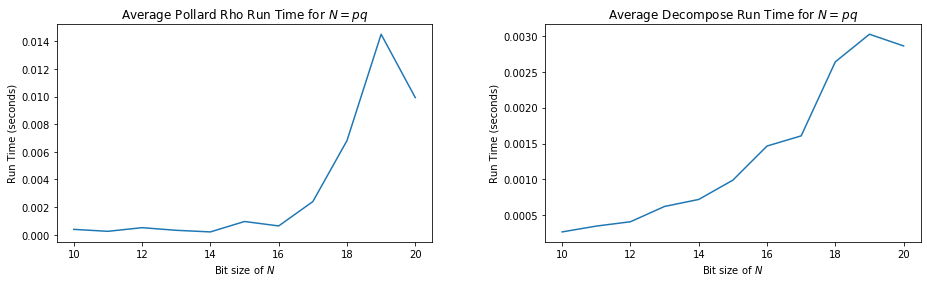

In [93]:
x = range(10,21)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(x,dl_pollard_rho_time)
ax2.plot(x,dl_decompose_timek)
ax1.set_title('Average Pollard Rho Run Time for $N = pq$')
ax1.set_xlabel('Bit size of $N$')
ax1.set_ylabel('Run Time (seconds)')
ax2.set_title('Average Decompose Run Time for $N = pq$')
ax2.set_xlabel('Bit size of $N$')
ax2.set_ylabel('Run Time (seconds)')
plt.subplots_adjust(left = 0, right = 2, wspace = 0.3)
plt.show()

### Comparing Pollard Rho and Decompose Functions

From our graphs which plot the average run time of these two factoring algorithms for $N$ = $pq$ where $p$ and $q$ are prime numbers, we can see that the average decompose run time is consistently lower for smaller bit sizes of $N$. However, when $N$ reaches $35$ bits, the average run time for the Pollard Rho function is lower than the average decompose run time for the first time.  From this bit size, the difference between the run time for the Pollard Rho function and the decompose function increases, depicting how the Pollard Rho method is far more effective than the decompose function with large bit sizes of $N$.

### Pollard Rho Time Complexity Check
#### Average Operations

We will check, firstly, that the Pollard Rho time complexity is indeed $O(N^{0.25})$.
We will do this by plotting graphs of $N$ against the worst-case operations performed by the function; this is when we iterate the function $10 \cdot N^{0.25}$. It would be interesting to see how close the Pollard Rho function is to performing at a worst case scenario when $N = pq$ so we will also plot how many operations the function actually performs too.

We will not use our average operations function here because we want to find our worst-case operations too.

In [151]:
def operations_case(a,b,c,func):
    '''
    For our pollard rho function, we will find the average operations using this function as well as the worst-case 
    maximum operations it will have to perform for increasing bit sizes of N between a and b.
    '''
    samples = generate_sampleNbits(a,b,c)
    sample_size = c
    average_samples = []
    
    for x in range(0,b-a+1):
        average_samples.append(np.mean(samples[x]))


    operations = []
    max_operations = []
    total_operations = []
    total_max_operations = []
    average_operations = []
    average_max_operations = []
    for i in range(b-a+1):
        for n in samples[i]:
            operations.append(func(n)[2])               #these are the actual operations performed by pollard rho
            max_operations.append(10*(n**0.25))                  #these are the worst-case operations performed by pollard rho
        
    split_operations = np.array_split(operations,b-a+1)
    split_max_operations = np.array_split(max_operations,b-a+1)
    for j in range(b-a+1):
        total_operations.append(np.sum(split_operations[j]))
        total_max_operations.append(np.sum(split_max_operations[j]))
    for k in range(b-a+1):
        average_operations.append(total_operations[k]/c)
        average_max_operations.append(total_max_operations[k]/c)

    opssample_data_frame = pd.DataFrame({'Average Value of Samples':average_samples, 
                                   'Average Operations':average_operations,
                                   'Average Maximum Operations':  average_max_operations})
    opssample_data_frame.index = range(a,b+1)
    opssample_data_frame.index.name = 'bit size of N'

    return opssample_data_frame



In [139]:
dl_pollard_rho_opsmax_file_name = 'Pollard Rho Average and Maximum Operations.csv'

In [145]:
# Pollard Rho Operations
if os.path.exists('data/' + dl_pollard_rho_opsmax_file_name) and read_times:
    # read
    dl_pollard_rho_opsmax = pd.read_csv(
        'data/' + dl_pollard_rho_opsmax_file_name, index_col=0)
else:
    # Create operations
    dl_pollard_rho_opsmax = operations_case(10, 50, 4, pollard_rho_N)  
    # Save operations
    dl_pollard_rho_opsmax.to_csv('data/' + dl_pollard_rho_opsmax_file_name)

In [146]:
dl_pollard_rho_opsmax

,Average Value of Samples,Average Operations,Average Maximum Operations
bit size of N,,,
10,7.285000e+02,2.00,51.734659
11,1.581500e+03,3.50,62.951549
12,3.057500e+03,7.00,74.083641
13,7.349000e+03,7.00,92.575076
14,1.029600e+04,5.75,100.648702
15,2.587850e+04,9.75,126.645722
16,3.769050e+04,7.25,139.275089
17,9.666950e+04,22.75,175.977648
18,1.678335e+05,106.75,202.023336


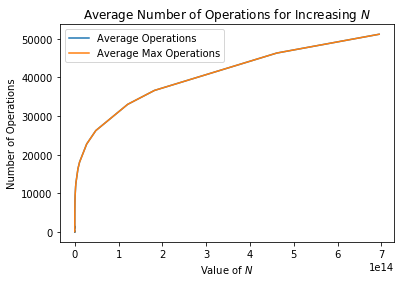

In [147]:
plt.plot(dl_pollard_rho_opsmax['Average Value of Samples'], dl_pollard_rho_opsmax['Average Operations'],
         label = 'Average Operations')
plt.plot(dl_pollard_rho_opsmax['Average Value of Samples'], dl_pollard_rho_opsmax['Average Maximum Operations'], 
         label = 'Average Max Operations')
plt.title('Average Number of Operations for Increasing $N$')
plt.xlabel('Value of $N$')
plt.ylabel('Number of Operations')
plt.legend()
plt.show()

As we can see above, the operations actually performed by the function is close to this worst-case scenario often so it turns out the graphs look pretty much identical. Therefore, since the worst-case scenario is where we iterate the function $10 \cdot N^{0.25}$ times, the graph has this shape, which would suggest that the time complexity is indeed $O(N^{0.25})$. Now, we will check if the average run time for the Pollard Rho also has this shape, and then we have strong evidence to support the time complexity being $O(N^{0.25})$.

The reason why the worst-case scenario and actual scenario are so similar is because I have coded the $N's$ to be generated such that the two non-trivial prime factors $p$ and $q$ are of the same bit length, meaning that the factors are quite large, especially for a larger bit size of $N$. This makes it more of a worst case scenario because as I stated at the start of this section, Pollard Rho is most effective when factorising small factors.

#### Average Run Time

Now, we will check if the average run time of the Pollard Rho function also has the shape of $O(N^{0.25})$.

Again, we will not use our average time function from earlier because in this case, we want to know what our sample values were so we are able to plot a graph with these $N$.

In [210]:
def avg_timesample(a,b,c,func):
    samples = generate_sampleNbits(a,b,c)
    sample_size = c

    average_samples = []
    
    for x in range(0,b-a+1):
        average_samples.append(np.mean(samples[x]))

    start = []
    end = []
    total_time = []
    average_time = []
    for i in range(b-a+1):
        start.append(process_time())           
        for n in samples[i]:
            func(n)
        end.append(process_time())  

    for j in range(b-a+1):
        total_time.append(end[j] - start[j])
    for k in range(b-a+1):
        average_time.append(total_time[k] / sample_size)
    
        timesample_data_frame = pd.DataFrame({'Average Value of Samples':average_samples, 
                                   'Average Time':average_time})
        timesample_data_frame.index = range(a,b+1)
        timesample_data_frame.index.name = 'bit size of N'
        
    return timesample_data_frame


In [212]:
average_time

NameError: name 'average_time' is not defined

In [157]:
dl_pollard_rho_timesample_file_name = 'Pollard Rho Average Runtimes for N bit size.csv'

In [160]:
# Pollard Rho Times
if os.path.exists('data/' + dl_pollard_rho_timesample_file_name) and read_times:
    # read
    dl_pollard_rho_timesample = pd.read_csv(
        'data/' + dl_pollard_rho_timesample_file_name, index_col=0)
else:
    # Create times
    dl_pollard_rho_timesample = avg_timesample(10, 50, 4, pollard_rho_N)  
    # Save times
    dl_pollard_rho_timesample.to_csv('data/' + dl_pollard_rho_timesample_file_name)

ValueError: arrays must all be same length

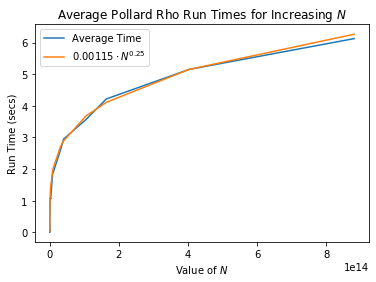

In [58]:
average_samples1 = []
for x in range(0,31):
    average_samples1.append(np.mean(samples1[x]))      #average value of N for each bit size in our sample
best_fit = []
for y in range(0,31):
    best_fit.append(0.00115*(average_samples1[y]**0.25))  

plt.title('Average Pollard Rho Run Times for Increasing $N$')
plt.plot(average_samples1, average_time, label = 'Average Time')
plt.plot(average_samples1, best_fit, label = '$0.00115 \cdot N^{0.25}$')
plt.xlabel('Value of $N$')
plt.ylabel('Run Time (secs)')
plt.legend()
plt.show()

We can see that the run time for the Pollard Rho function also follows a graph of $c \cdot N^{0.25}$ for some constant $c$. So we are able to say with reasonable confidence that the time complexity is indeed $O(N^{0.25})$ as stated in the question. Furthermore, now we are able to extrapolate the graph of our run times since we know what this value is $c$ now. We did this from trying different values of $c$ until we got a graph which aligned with our average run times.

### Feasibility of the Pollard Rho Function

Similarly to when checking the feasibility of the decompose function, we will say that the function stops becoming feasible once the average run time is longer than $2$ years. 

We know that the expected running time for the Pollard Rho function is $c \cdot N^{0.25}$ where $c = 0.00115$. Therefore, we can conjecture that this function becomes infeasible when 
>$0.00115 \cdot N^{0.25} = 63070000$

This is because $63070000$ is roughly the number of seconds in $2$ years. 
>$0.00115 \cdot N^{0.25} = 63070000 \implies N^{0.25} = 54843478260.9 \implies N = 54843478260.9^4$

> $N \approx 9.0469036 \times 10^{42}$

In [60]:
len(bin(9046903600000000000000000000000000000000000)) - 2

143

Now we have that the number of bits in this value of $N$ is $143$ from the code above so we can conjecture that the Pollard Rho function becomes infeasible at roughly $143$ bits when decomposing a product of two primes.

##  Pollard p-1 Algorithm

If we know a number $N$ is the product of two primes, $p$ and $q$ we can use the Pollard $p-1$ Algorithm to find $p$ and $q$. So if we have:

$N=pq$

We know by Fermat's little theorem, that for $a$ and prime number $p$, where $gcd(a,p)=1$:

$a^{p-1} \equiv 1 (mod p)$

We don't know $p$ but we can work with it. Take arbitary $L \in \mathbb{N}$. Now we suppose $p-1$ is a factor of $L$ then:

$p-1|L$

Now using Fermats little theorem again:

$a^{L} \equiv (a^{p-1})^{k} \equiv 1(mod p)$

So $p$ divides $a^{L}-1$. Since $p$ is a factor of $N$, $gcd(a^{L}-1,N)$ will include $p$.

Now how do we find $L$?


Since $p-1$ is not prime it is the product of prime numbers:

$p-1 = p_{1}^{e_{1}}  \times  p_{2}^{e_{2}}  \times  ... $

Where for some number $B$,

$\forall   p_{i} \leq B$

This property makes $p-1$ $B$-power smooth. Let $L$ be the least common multiple of all powers of primes $\leq b$ that are $\leq n$. If $l^{q} \leq n$ , then $q\space$ln $l \leq$ ln $n$ and so $q\leq \lfloor \frac{ln\space n}{ln\space l} \rfloor$. Thus

$$ L = \prod_{primes \space   l \leq B} q^{\lfloor ln \space n \space/\space ln\space l \rfloor} $$


### Algorithm


$\bullet$ Select $B$

$\bullet$ select random integer $a$, between 2 and $n-1$. Compute gcd($a,n$). If gcd($a,n$)$\geq 2$ then return $gcd(a,n)$

$\bullet$ For each prime $l\leq B$:
           Compute $q\leq \lfloor \frac{ln(n)}{ln(l)} \rfloor$ and set $a = a^{l^q} (mod n)$
           
           
$\bullet$ Compute $d \space = \space gcd(a,n)$


$\bullet$ If $d=1$ then increase $B$. If $d=n$ then reduce $B$ and then start over again. Otherwise return $d$.

In [63]:
def primes(n):
    alist = []
    for i in range(n+1):
        if is_prime_miller_rabin(i,40) == True:
            alist.append(i)
    return alist


def pow_mod_pingala(base,exponent,modulus):
    n = 1                            # n will be updated as shown above 
    bin_string = bin(exponent)[2:]   # Get exponent in binary 
    for bit in bin_string:           # Iterate throught binary string
        if bit == '1':              
            n = n * n * base  %  modulus
        if bit == '0':              # The only other possible case. 
            n = n * n  %  modulus
    return n 

def pminus1(n):
    b = math.ceil(n**0.5)           #this is the smoothness bound, set because all prime factors of N are less than the square root of N
    alist = primes(b)
    a = 2
    d = gcd(a,n)
    found = False
    if d >= 2:
        found = True
        return d
    else:
        while found == False:
            for q in alist:
                l = math.floor(math.log(n,10)/math.log(q,10))
                c = pow(q,l)
                a = pow_mod_pingala(a,c,n)      #here, we are using modular exponentiation from the lecture notes which is a lot faster than pow
                d = gcd(a-1, n)
                if d == 1:
                    b += 1
                if d == n:
                    b -= 1    
                else:
                    found == True
                    return d, int(n/d)


In [13]:
#Tests
assert pminus1(551)[0] * pminus1(551)[1] == 551    #checking pminus1 works for 10 bit N
assert pminus1(542257)[0] * pminus1(542257)[1] == 542257    #checking pminus1 works for 20 bit N
assert pminus1(818810243)[0] * pminus1(818810243)[1] == 818810243    #checking pminus1 works for 30 bit N
assert pminus1(30662248501)[0] * pminus1(30662248501)[1] == 30662248501    #checking pminus1 works for 35 bit N


### How long does the Pollard p-1 Algorithm Take?

We will run a few %timeit tests for increasing values of $N = pq$ to find out roughly how effective this algorithm is at factorising these numbers and then compare it to our previous algorithms.

In [14]:
%timeit pminus1(551)                #timeit test for a 10 bit N

876 µs ± 51.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
%timeit pminus1(542257)             #timeit test for a 20 bit N

18.2 ms ± 392 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
%timeit pminus1(818810243)          #timeit test for a 30 bit N

522 ms ± 7.02 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%timeit pminus1(30662248501)        #timeit test for a 35 bit N

3.22 s ± 44.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
#these times are the runtimes to one significant figure we have found from earlier when testing each function for
#10,20,30 and 35 bits using the timeit results when running on my laptop

bits = [10,20,30,35]
rough_pminus1_times = [0.0009,0.02,0.5,3]
rough_decompose_times = [0.0001,0.003,0.1,0.6]
rough_rho_times = [0.0001,0.01,0.1,0.3]


print("Approximate Running Times of our Factoring Algorithms for N = pq")
print(' ')
print("Bit Size   Pollard's p-1   Decompose   Pollard's Rho")
print("========   =============   =========   ============")
for n in range(len(rough_pminus1_times)):
    bitsn = str(bits[n])
    pminus1_timen = str(rough_pminus1_times[n])
    decompose_timen = str(rough_decompose_times[n])
    rho_timen = str(rough_rho_times[n])
    print("{:7s}    {:7s}         {:7s}     {:7s}     ".format(bitsn,pminus1_timen,decompose_timen,rho_timen))
    
    

Approximate Running Times of our Factoring Algorithms for N = pq
 
Bit Size   Pollard's p-1   Decompose   Pollard's Rho
========   =============   =========   ============
10         0.0009          0.0001      0.0001      
20         0.02            0.003       0.01        
30         0.5             0.1         0.1         
35         3               0.6         0.3         


### Analysis of Results

It is clear to see from these times that this algorithm is not as efficient as our decompose function and definitely not as efficient as our Pollard's Rho algorithm.

We can see that for each bit size of N, the Pollard $p-1$ algorithm is consistently slower than the other two.

This suggests to us that it is never advantageous to use Pollard's $p-1$ algorithm for any $N's$ because these other two functions are more efficient. 

In terms of an RSA setting of factorising $N$ when $N$ is very large, it is definitely not feasible to use Pollard's $p-1$ algorithm because even at a small bit size of $35$, the runtime is $3$ seconds which is $10$ times slower than our Pollard Rho algorithm which we have already concluded becomes infeasible at $169$ bits.

### Time Complexity of the Pollard p-1 Algorithm

The time complexity of the Pollard p-1 method for finding a factor $p$ of $n$ such that $p-1$ is $B$-smooth is $O(\frac{Bln(n)}{ln(B)})$.

This time complexity is exponential like both of our previous algorithms so as the bit size of $N$ increases, the running time will increase at a faster rate. We are already able to see this happening from the bit sizes going from $10$ to $35$. This is becase from $10$ to $20$ bit sizes, the runtime increases by $0.1991$ seconds. However, from $20$ to $30$ bit sizes, the runtime increases by $0.58$ seconds.

## Lenstra Elliptic-Curve Factorisation

Lenstra's Elliptic-Curve Factorisation algorithm is the third fastest method for factoring large numbers and is the best for finding small factors of $N$.

## Elliptic curve approach
An elliptic curve is in the form: 

$$ y^{3} = x^{3} +Ax + B$$



In the elliptic curve approach we replace $\mathbb{Z} /p \mathbb{Z} $ with rational points $\mathbb{F}_{p}$ on the elliptic curve $E(\mathbb{F}_{p})$. Instead of $a^{k}$ we calculate $kP$ on a point $P\in E(\mathbb{F}_{p})$. When the number of rational points on the curve (#$E(\mathbb{F}_{p})$) divides $k$ then $kP=O$, where $O$ is the infinite point on the curve, it will provide a factor of $n$. If #$E(\mathbb{F}_{p})$$\nmid k$ we select another curve $E^{'}(\mathbb{F}_{p})$ which will have value #$E^{'}(\mathbb{F}_{p})$. This will be random in the Hasse-Weil bound that states for a curve $E(\mathbb{F}_{p})$,   $1+p-\sqrt{2p}<$#$E(\mathbb{F}_{p})$$<1+p + \sqrt{2p}$.

To calculate multiples of $P\in E(\mathbb{F}_{p})$ we will use repeated addition and doubling. We will work over $\mathbb{Z} /n \mathbb{Z} $. We know this is not a field as some elements $g \in \mathbb{Z} /n \mathbb{Z}$ do not have inverses but this happens when $gcd(g,n) \neq 1$ which is what we're looking for. Since we are using repeated addition and doubling, it is important to look at the formula for adding two points $P$ and $Q$ on the curve $E$ to get a point $R$

$$ x_{R} = \lambda^{2} - x_{P} - x_{Q}$$
$$ y_{R} = y_{Q} + \lambda (x_{R} - x_{Q})$$

if $x_{P} \neq x_{Q}$: 

$$ \lambda = (y_{P} - y_{Q})(x_{P} - x_{Q})^{-1}$$

if $x_{P} = x_{Q}$:

$$ \lambda = (3x_{p}^{2} + A)(2y_{p})^{-1} $$

We will check if $x_{P} - x_{Q}$ and $2y_{p}$ have inverses in their respected cases.

### Algorithm

$\bullet$ Choose random $A$, $x_{p}$, $y_{p}$ such that $1< A, x_{p}, y_{p} < n$.

$\bullet$ Calculate $B$ using elliptic curve formula

$\bullet$ Check curve is non-singular by seeing that $gcd(4A^{3} + 27B^{2}, n)=1$. If it equals $n$ then generate a different curve. If it is between $1$ and $n$, we're done.

$\bullet$ Using your chosen $K$ compute $lcm(1,....,K)$

$\bullet$ Attempt to compute $kP$. If the formula doesn't fail then change the curve.  After a while if this still doesn't produce a factor, increase $k$ and repeat

$\bullet$ If the formula does fail return the $gcd$ of either $x_{P} - x_{Q}$ or $2y_{p}$ with $n$ depending on the case.



In [64]:
def modular_inv(a, b):
    if b == 0:
        return 1, 0, a
    q, r = divmod(a, b)
    x, y, g = modular_inv(b, r)
    return y, x - q * y, g

    
# Addition in Elliptic curve modulo m space
def elliptic_add(p, q, a, b, m):
    # If one point is infinity, return other one
    if p[2] == 0:
        return q
    if q[2] == 0: 
        return p
    if p[0] == q[0]:
        if (p[1] + q[1]) % m == 0:
            return 0, 1, 0  # Infinity
        num = (3 * p[0] * p[0] + a) % m
        denom = (2 * p[1]) % m
    else:
        num = (q[1] - p[1]) % m
        denom = (q[0] - p[0]) % m
    inv, _, g = modular_inv(denom, m)
    # Unable to find inverse, arithmetic breaks
    if g > 1:
        return 0, 0, denom  # Failure
    z = (num * inv * num * inv - p[0] - q[0]) % m
    return z, (num * inv * (p[0] - z) - p[1]) % m, 1

# Multiplication (repeated addition and doubling)
def elliptic_mul(k, p, a, b, m):
    r = (0, 1, 0)  # Infinity
    while k > 0:
        # p is failure, return it
        if p[2] > 1:
            return p
        if k % 2 == 1:
            r = elliptic_add(p, r, a, b, m)
        k = k // 2
        p = elliptic_add(p, p, a, b, m)
    return r


# Lenstra's algorithm for factoring
# Limit specifies the amount of work permitted
def lenstra(n, limit):
    g = n
    while g == n:
        # Randomized x and y
        q = ran.randint(0, n - 1), ran.randint(0, n - 1), 1
        # Randomized curve coefficient a, computed b
        a = ran.randint(0, n - 1)
        b = (q[1] * q[1] - q[0] * q[0] * q[0] - a * q[0]) % n
        g = gcd(4 * a * a * a + 27 * b * b, n)  # singularity check
    # If we got lucky, return lucky factor
    if g > 1:
        return g, n//g
    # increase k step by step until lcm(1, ..., limit)
    for p in primes(limit):
        pp = p
        while pp < limit:
            q = elliptic_mul(p, q, a, b, n)
            # Elliptic arithmetic breaks
            if q[2] > 1:
                return gcd(q[2], n), n//gcd(q[2],n)
            pp = p * pp
    return False

In [127]:
#Tests
#These assert checks work most of the time, if it does not work, the lenstra function has returned False, but if we 
#run the checks again, it is likely the asserts will run because lenstra returns factors with high probability

a = lenstra(551,1000)
assert a[0] * a[1] == 551    #checking lenstra works for 10 bit N
b = lenstra(542257,1000)
assert b[0] * b[1] == 542257    #checking lenstra works for 20 bit N
c = lenstra(818810243,1000)
assert c[0] * c[1] == 818810243    #checking lenstra works for 30 bit N
d = lenstra(30662248501,1000)
assert d[0] * d[1] == 30662248501    #checking lenstra works for 35 bit N


### How long does the Lenstra's Algorithm Take?

As before, we will run a few %timeit tests for increasing values of $N = pq$ to find out roughly how effective this algorithm is at factorising these numbers and then compare it to our previous algorithms.

In [129]:
%timeit lenstra(551,1000)                #timeit test for a 10 bit N

26.8 ms ± 5.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [134]:
%timeit lenstra(542257,1000)          #timeit test for a 20 bit N

28.3 ms ± 4.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [135]:
%timeit lenstra(818810243,1000)          #timeit test for a 30 bit N

33.3 ms ± 2.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [136]:
%timeit lenstra(30662248501,1000)        #timeit test for a 35 bit N

44.5 ms ± 3.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [169]:
#these times are the runtimes to one significant figure we have found from earlier when testing each function for
#10,20,30 and 35 bits using the timit results when running them on my laptop

rough_lenstra_times = [0.03,0.03,0.03,0.04]

print("Approximate Running Times of our Factoring Algorithms for N = pq")
print(' ')
print("Bit Size   Lenstra   Decompose   Pollard's Rho   Pollard's p-1")
print("========   =======   =========   =============   =============")
for n in range(len(rough_pminus1_times)):
    bitsn = str(bits[n])
    pminus1_timen = str(rough_pminus1_times[n])
    decompose_timen = str(rough_decompose_times[n])
    rho_timen = str(rough_rho_times[n])
    lenstra_timen = str(rough_lenstra_times[n])
    print("{:7s}    {:7s}   {:7s}     {:7s}         {:7s}".format(bitsn,lenstra_timen,decompose_timen,rho_timen,pminus1_timen))
    
    

Approximate Running Times of our Factoring Algorithms for N = pq
 
Bit Size   Lenstra   Decompose   Pollard's Rho   Pollard's p-1
========   =======   =========   =============   =============
10         0.03      0.0001      0.0001          0.0009 
20         0.03      0.003       0.01            0.02   
30         0.03      0.1         0.1             0.6    
35         0.04      0.6         0.3             3      


### Analysis of Results

From these results, we can see that Lenstra's algorithm far outperforms all other algorithms when factorising larger $N$ of bit size $35$. Also, judging by the way the approximate running time of Lenstra's algorithm stays roughly the same ffrom bit sizes $10$ to $35$, it is not an unreasonable assumption that Lenstra's will be able to factorise far larger $N$ than Pollard's Rho, Pollard's $p-1$ and the decompose function could. We will test this claim in more detail later through more %timeit tests for larger bit sizes of $N$.

However, for small bit sizes of $20$ or less, all other algorithms are faster, even Pollard's $p-1$! 

Therefore, if we ever decided to implement our own factoring algorithm for $N = pq$ using all of these algorithms, we would use the decompose function up to a bit size of about $20$ and from here, use Lenstra's algorithm to factorise all other larger

### Tests for Larger $N$

For these larger $N$, we have increased the amount of work permitted to be done by the algorithm by $10$ times so it still returns factors of $N$ with reasonably high probability.

In [84]:
generate_Nbits(70)

782057011584921932569

In [235]:
%timeit lenstra(706542481693,10000)           #timeit test for a 40 bit N

285 ms ± 113 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [237]:
%timeit lenstra(33629819514581,10000)         #timeit test for a 45 bit N

359 ms ± 158 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [239]:
%timeit lenstra(915925713947053,10000)        #timeit test for a 50 bit N

531 ms ± 151 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [83]:
%timeit lenstra(619664021840893559,100000)    #timeit test for a 60 bit N, increased amount of work dony by 10 times

4.48 s ± 1.9 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


These results give further evidence that Lenstra's algorithm is far better at factorsing $N$ as a product of two primes than any of the previous algorithms we have looked at. Especially for large bit sizes due to its sub-exponential running time which we will discuss in the next section.

### Time Complexity of Lenstra's Algorithm

Out of all of the factoring algorithms which we have seen, Lenstra's Elliptic Curve factoring algorithm is the only one which has a sub-exponential running time making it easily the most effective out of all of them to factorise large $N$. 

The Handbook of Applied Cryptography states in chapter $3$ that the expected running time of Lenstra's algorithm for $N = pq$ where $p$, $q$ are primes of similar size is as follows.

$L_N[0.5, 1] = O(exp((1 + o(1))(ln(N)^{0.5}(ln(ln(N))^{0.5})$

This is actually the same as the time complexity as the quadratic sieve algorithm which is the second fastest known factoring algorithm after the number field sieve factoring algorithm discovered in $1990$. However, in practise, Lenstra's algorithm is still slower than the quadratic sieve because the operations in the quadratic sieve are single precision operations whilst in Lenstra's algorithm, the operations are more computationally intensive multi-precision elliptic curve operations. 

